# Pandas 자료구조

In [73]:
from IPython.display import Image
import numpy as np

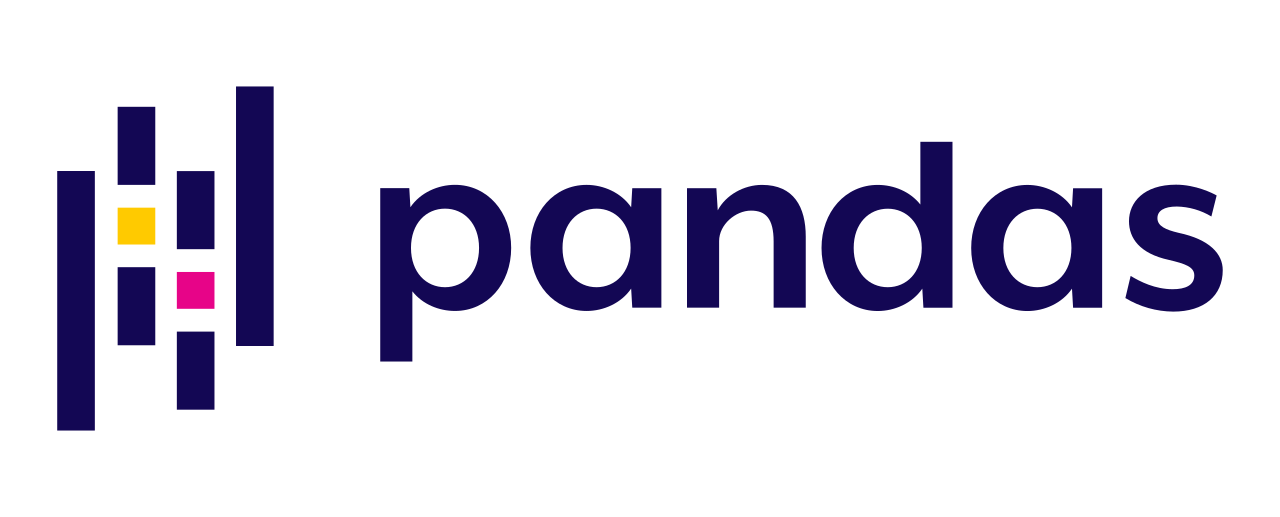

In [74]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1280px-Pandas_logo.svg.png', width=500)

## Pandas

### 개요

**관계형** 또는 **레이블이 된** 데이터로 쉽고 직관적 으로 작업할 수 있도록 설계되었고, 빠르고, 유연한 데이터 구조를 제공하는 Python 패키지입니다.

또한, 어떤 언어로도 사용할 수 있는 가장 **강력하고 유연한 오픈 소스 데이터 분석 / 조직 도구**입니다.

Pandas는 다음의 종류의 데이터에 **적합한 분석 패키지**입니다.

- SQL 테이블 또는 Excel 스프레드 시트에서와 같은 열과 행으로 이루어진 테이블 형식 데이터
- 정렬되고 정렬되지 않은 시계열 데이터
- 다른 형태의 관찰 / 통계 데이터 세트

### Pandas 공식 문서

공식 문서는 다음 링크에서 확인할 수 있습니다.
- [공식 도큐먼트](https://pandas.pydata.org/docs/reference/index.html)

## alias(별칭)와 버전

In [75]:
import pandas

In [76]:
pandas.__version__

'1.1.5'

pandas는 `pd`의 alias를 사용합니다.

In [77]:
import pandas as pd

In [78]:
pd

<module 'pandas' from '/opt/conda/lib/python3.6/site-packages/pandas/__init__.py'>

In [79]:
pd.__version__

'1.1.5'

## Series

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html?highlight=series#pandas.Series)

Pandas의 Series는 1차원 배열로서 다음의 특징을 가집니다.

- 데이터를 담는 **차원 배열 구조**를 가집니다.
- **인덱스(index)를 사용 가능**합니다.
- **데이터 타입**을 가집니다. (dtype)

### Series의 생성

#### **numpy array**로 생성한 경우

In [80]:
arr = np.arange(100, 105)
arr

array([100, 101, 102, 103, 104])

In [81]:
s = pd.Series(arr)
s

0    100
1    101
2    102
3    103
4    104
dtype: int64

#### dtype을 지정한 경우

In [82]:
s = pd.Series(arr, dtype='int32')
s

0    100
1    101
2    102
3    103
4    104
dtype: int32

#### **list**로 생성한 경우

In [83]:
s = pd.Series(['부장', '차장', '대리', '사원', '인턴'])
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

#### 다양한 타입(type)의 데이터를 섞은 경우

Series에 다양한 데이터 타입의 데이터로 생성시, **object** 타입으로 생성됩니다.

In [84]:
s = pd.Series([91, 2.5, '스포츠', 4, 5.16])
s

0      91
1     2.5
2     스포츠
3       4
4    5.16
dtype: object

### index

In [85]:
# 샘플데이터
s = pd.Series(['부장', '차장', '대리', '사원', '인턴'])
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

기본 `index`는 0부터 숫자형 index가 부여됩니다.

In [86]:
s

0    부장
1    차장
2    대리
3    사원
4    인턴
dtype: object

기본 부여된 `index`로 값을 조회할 수 있습니다. 

(indexing / slicing 은 이후에 좀 더 자세히 다룹니다.)

In [87]:
s[0]

'부장'

`.index`를 출력하면 **RangeIndex**로 표기됨을 확인할 수 있는데, 기본 부여된 **index는 0~ 순차적으로 부여**되기 때문입니다.

In [88]:
s.index

RangeIndex(start=0, stop=5, step=1)

내가 원하는 `index`를 **지정**할 수 있습니다.

In [89]:
s = pd.Series(['마케팅', '경영', '개발', '기획', '인사'], index=['a', 'b', 'c', 'd', 'e'])
s

a    마케팅
b     경영
c     개발
d     기획
e     인사
dtype: object

새롭게 부여된 index로 **접근 가능**합니다.

In [90]:
s['c']

'개발'

하지만, 기본 부여된 **숫자형 index로도 접근 가능**합니다.

In [91]:
s[2]

'개발'

Series.`index`로도 index를 지정할 수 있습니다. 단, 지정하는 `index`의 갯수가 데이터의 갯수와 맞아야 합니다.

In [92]:
s.index = list('abcde')

In [93]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

### values

`values`는 Series 데이터 값(value)만 **numpy array** 형식으로 가져 옵니다.

In [94]:
s.values

array(['마케팅', '경영', '개발', '기획', '인사'], dtype=object)

### ndim - 차원

Series는 1차원 자료구조이기 때문에 ndim 출력시 **1**이 출력됩니다.

In [95]:
s.ndim

1

### shape

shape은 데이터의 모양(shape)을 알아보기 위하여 사용하는데, Series의 shape은 **데이터의 갯수**를 나타냅니다.

**튜플(tuple)** 형식으로 출력됩니다.

In [96]:
s.shape

(5,)

### NaN (Not a Number)

Pandas에서 **NaN 값**은 비어있는 **결측치 데이터**를 의미합니다.

임의로 비어있는 값을 대입하고자 할 때는 **numpy의 nan (np.nan)**을 입력합니다.

In [97]:
s = pd.Series(['선화', '강호', np.nan, '소정', '우영'])
s

0     선화
1     강호
2    NaN
3     소정
4     우영
dtype: object

### 연습문제

다음과 같은 Series를 생성해 주세요

- s1 변수에 Series를 생성합니다.
- dtype은 'float32'가 출력 되도록 합니다.

In [98]:
# 코드를 입력해 주세요
s1 = pd.Series(np.arange(50, 55), dtype='float32')
s1

0    50.0
1    51.0
2    52.0
3    53.0
4    54.0
dtype: float32

다음과 같은 Series를 생성해 주세요

- s2 변수에 Series를 생성합니다.

In [99]:
# 코드를 입력해 주세요
s2 = pd.Series(['apple', np.nan, 'banana', 'kiwi', 'gubong'], index=list('가나다라마'))
s2

가     apple
나       NaN
다    banana
라      kiwi
마    gubong
dtype: object

### indexing

In [100]:
s = pd.Series(['손흥민', '김연아', '박세리', '박찬호', '김연경'], index=['a', 'b', 'c', 'd', 'e'])
s

a    손흥민
b    김연아
c    박세리
d    박찬호
e    김연경
dtype: object

index는 기본 부여된 **숫자형 index**와 내가 **새롭게 지정한 index** **둘 다 조회 가능**합니다.

In [101]:
s[1]

'김연아'

In [102]:
s['b']

'김연아'

### fancy indexing

**fancy indexing**은 index를 선택하여 list로 정의하고, 선택한 index list로 indexing 하는 방법입니다.

In [103]:
s[['a','c']]

a    손흥민
c    박세리
dtype: object

In [104]:
i = ['a', 'c']
s[i]

a    손흥민
c    박세리
dtype: object

### boolean indexing

**boolean index**은 index list 에서 **True인 index 만 선택**합니다.

주의해야할 점은 반드시 boolean index list의 갯수와 Series의 갯수가 맞아야 합니다.

In [105]:
s[[True, True, False, False, True]]

a    손흥민
b    김연아
e    김연경
dtype: object

In [106]:
i = [True, True, False, False, True]
s[i]

a    손흥민
b    김연아
e    김연경
dtype: object

조건을 걸어서 **boolean index list를 먼저 만들어 준 뒤 대입**할 수 있습니다.

In [107]:
s = pd.Series([29, 99, np.nan, 11, 56], index=['a', 'b', 'c', 'd', 'e'])
s

a    29.0
b    99.0
c     NaN
d    11.0
e    56.0
dtype: float64

In [108]:
s > 50

a    False
b     True
c    False
d    False
e     True
dtype: bool

In [109]:
s[s > 50]

b    99.0
e    56.0
dtype: float64

### 결측치 (NaN) 값 처리

`isnull()`과 `isna()`은 **NaN** 값을 찾는 함수 입니다.

`isnull()`과 `isna()`는 결과가 동일합니다.

In [110]:
s.isnull()

a    False
b    False
c     True
d    False
e    False
dtype: bool

In [111]:
s.isna()

a    False
b    False
c     True
d    False
e    False
dtype: bool

이를 boolean indexing에 적용해볼 수 있습니다.

In [112]:
s[s.isnull()]

c   NaN
dtype: float64

In [113]:
s[s.isna()]

c   NaN
dtype: float64

`notnull()`은 NaN값이 아닌, 즉 비어있지 않은 데이터를 찾는 함수 입니다.

In [114]:
s.notnull()

a     True
b     True
c    False
d     True
e     True
dtype: bool

In [115]:
s[s.notnull()]

a    29.0
b    99.0
d    11.0
e    56.0
dtype: float64

### slicing

**(주의)** 숫자형 index로 접근할 때는 뒷 index가 포함되지 않습니다.

In [116]:
s[1:3]

b    99.0
c     NaN
dtype: float64

새롭게 지정한 인덱스는 시작 index와 끝 index **모두 포함**합니다.

In [117]:
s['b':'c']

b    99.0
c     NaN
dtype: float64

## DataFrame

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

`pd.DataFrame`

- 2차원 데이터 구조 (Excel 데이터 시트를 생각하시면 됩니다)
- 행(row), 열(column)으로 구성되어 있습니다.
- 각 열(column)은 각각의 데이터 타입 (dtype)을 가집니다.

### 생성

**list 를 통한 생성**할 수 있습니다. DataFrame을 만들 때는 **2차원 list를 대입**합니다.

In [118]:
pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


아래 예제와 같이 **columns를 지정**하면, DataFrame의 각 열에 대한 컬럼명이 붙습니다.

In [119]:
pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]], columns=['가', '나', '다'])

,가,나,다
0,1,2,3
1,4,5,6
2,7,8,9


**dictionary를 통한 생성**도 가능합니다.

편리한 점은 dictionary의 **key 값이 자동으로 column 명으로 지정**됩니다.

In [120]:
data = {
    'name': ['Kim', 'Lee', 'Park'], 
    'age': [24, 27, 34], 
    'children': [2, 1, 3]
}

In [121]:
pd.DataFrame(data)

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


### 속성

DataFrame은 다음의 **속성**을 가집니다.

- **index**: index (기본 값으로 RangeIndex)
- **columns**: column 명
- **values**: numpy array형식의 데이터 값
- **dtypes**: column 별 데이터 타입
- **T**: DataFrame을 전치(Transpose)

In [122]:
data = {
    'name': ['Kim', 'Lee', 'Park'], 
    'age': [24, 27, 34], 
    'children': [2, 1, 3]
}

df = pd.DataFrame(data)
df

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


In [123]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [124]:
df.columns

Index(['name', 'age', 'children'], dtype='object')

In [125]:
df.values

array([['Kim', 24, 2],
       ['Lee', 27, 1],
       ['Park', 34, 3]], dtype=object)

In [126]:
df.dtypes

name        object
age          int64
children     int64
dtype: object

In [127]:
df.T

,0,1,2
name,Kim,Lee,Park
age,24,27,34
children,2,1,3


### index 지정

In [128]:
df

,name,age,children
0,Kim,24,2
1,Lee,27,1
2,Park,34,3


In [129]:
df.index = list('abc')
df

,name,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


(참고) DataFrame의 indexing / slicing은 나중에 세부적으로 다루도록 하겠습니다.

### column 다루기

DataFrame에 key 값으로 column의 이름을 지정하여 column을 선택할 수 있습니다.

1개의 column을 가져올 수 있으며, **1개의 column 선택시 Series**가 됩니다.

In [130]:
df['name']

a     Kim
b     Lee
c    Park
Name: name, dtype: object

In [131]:
type(df['name'])

pandas.core.series.Series

2개 이상의 column 선택은 **fancy indexing으로 가능**합니다.

In [132]:
df[['name', 'children']]

,name,children
a,Kim,2
b,Lee,1
c,Park,3


(참고) column에 대한 slicing도 가능 하지만 이 부분도 나중에 다루도록 하겠습니다.

**rename**으로 column명 변경 가능합니다.

DataFrame.rename(columns={'바꾸고자 하는 컬럼명': '바꿀 컬럼명'})

In [133]:
df.rename(columns={'name': '이름'})

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


In [134]:
df.rename({'name': '이름'}, axis=1)

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


`inplace=True` 옵션으로 변경사항을 바로 적용할 수 있습니다.

In [135]:
df.rename(columns={'name': '이름'}, inplace=True)
df

,이름,age,children
a,Kim,24,2
b,Lee,27,1
c,Park,34,3


### 연습문제

다음의 DataFrame을 생성하세요

- 생성된 DataFrame은 df 변수에 할당합니다.

In [149]:
# 코드를 입력해 주세요
data = {
    'food': ['KFC', 'McDonald', 'SchoolFood'], 
    'price': [1000, 2000, 2500], 
    'rating': [4.5, 3.9, 4.2]
}

df = pd.DataFrame(data)
df

,food,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


food 컬럼과 rating 컬럼만 선택하여 출력하세요

In [150]:
# 코드를 입력해 주세요
df[['food', 'rating']]

,food,rating
0,KFC,4.5
1,McDonald,3.9
2,SchoolFood,4.2


food 컬럼명을 place로 컬럼명을 변경해 주세요

In [138]:
# 코드를 입력해 주세요
df.rename(columns={'food': 'place'}, inplace=True)
df

,place,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


# Pandas 파일 입출력

## 모듈 import

In [139]:
from IPython.display import Image
import numpy as np
import pandas as pd

## 데이터 다운로드

In [140]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_transportation.xlsx
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_population.csv
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/titanic_train.csv

--2021-10-22 00:04:20--  http://sk.jaen.kr:8080/seoul_transportation.xlsx
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 304 Not Modified
File ‘seoul_transportation.xlsx’ not modified on server. Omitting download.

--2021-10-22 00:04:20--  http://sk.jaen.kr:8080/seoul_population.csv
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 304 Not Modified
File ‘seoul_population.csv’ not modified on server. Omitting download.

--2021

## Excel

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

### Excel - 불러오기

Excel 데이터를 바로 읽어들일 수 있으며, `sheet_name`을 지정하면 해당 sheet를 가져옵니다.

In [141]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='철도')

XLRDError: Excel xlsx file; not supported

In [ ]:
excel.head()

In [ ]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='버스')
excel.head()

`sheet_name`을 None으로 지정하면, 모든 sheet를 가지고 옵니다.

가지고 올 때는 OrderedDict로 가져오며, `keys()`로 **시트명을 조회**할 수 있습니다.

In [ ]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name=None)
excel

In [ ]:
# 시트 조회
excel.keys()

In [ ]:
excel['철도'].head()

In [ ]:
excel['버스'].head()

### Excel - 저장하기

DataFrame을 Excel로 저장할 수 있으며, Excel로 저장시 **파일명**을 지정합니다.

- `index=False` 옵션은 가급적 꼭 지정하는 옵션입니다. 지정을 안하면 **index가 별도의 컬럼으로 저장**되게 됩니다.
- `sheet_name`을 지정하여, 저장할 시트의 이름을 변경할 수 있습니다.


In [ ]:
excel.to_excel('sample.xlsx', index=True)

In [ ]:
excel.to_excel('sample1.xlsx', index=False, sheet_name='샘플')

### Excel - 여러개의 시트에 저장

여래 개의 시트에 저장하기 위해서는 **ExcelWriter를 사용**해야 합니다.

In [ ]:
writer = pd.ExcelWriter('sample2.xlsx')
excel.to_excel(writer, index=False, sheet_name='샘플1')
excel.to_excel(writer, index=False, sheet_name='샘플2')
excel.to_excel(writer, index=False, sheet_name='샘플3')
writer.close()

## CSV (Comma Separated Values)

- 한 줄이 한 개의 행에 해당하며, 열 사이에는** 쉼표(,)를 넣어 구분**합니다.
- Excel보다는 훨씬 가볍고 **차지하는 용량이 적기 때문에 대부분의 파일데이터는 csv 형태**로 제공됩니다.

(참고) 쉼표를 찍어 놓은 금액 데이터(100,000)를 CSV에 직접 집어넣으면 나중에 해석할 때 서로 다른 열로 취급되므로 문제가 될 수 있습니다. 해결책으로 쉼표 대신 탭 문자(\t)를 구분자로 사용하는 것이다. 이러한 경우 **Tab Separated Values(TSV)**라고 부른다.

### CSV - 불러오기

In [ ]:
df = pd.read_csv('seoul_population.csv')

In [ ]:
df.head()

때때로 한글데이터를 불러올 때 다른 인코딩을 사용해야하는 경우도 있습니다.그럴 땐 `encoding` 옵션을 지정해주면 됩니다.

In [ ]:
df = pd.read_csv('seoul_population.csv', encoding='utf8')

In [ ]:
df.head()

### CSV - 큰 파일 데이터 끊어서 불러오기

데이터의 크기가 매우 큰 경우 memory에 한 번에 로드할 수 없습니다.

`chunksize`를 지정하고 `chunksize`만큼 끊어서 불어와서 처리하게 되면 용량이 매우 큰 데이터도 처리할 수 있습니다.

예시) `chunksize=10`: 5개의 데이터를 로드합니다.

In [ ]:
df = pd.read_csv('seoul_population.csv', chunksize=10)

In [ ]:
for d in df:
    display(d)

### CSV - 저장하기

저장하는 방법은 excel과 유사합니다. 다만, csv파일 형식에는 `sheet_name` 옵션은 없습니다.

In [ ]:
df = pd.read_csv('seoul_population.csv')

In [ ]:
df.to_csv('sample.csv', index=False)

읽어들인 **Excel 파일도 Csv로 저장**할 수 있습니다.

In [ ]:
excel = pd.read_excel('seoul_transportation.xlsx', sheet_name='버스')
excel.head()

# Pandas 조건 정렬 조건 필터

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 실습에 활용할 데이터셋

### 타이타닉: 탑승객의 사망자와 생존자 데이터 분석

In [ ]:
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

In [ ]:
Image('https://1.bp.blogspot.com/-vTBB13E6mtA/WzmniMnyWnI/AAAAAAACzLs/4EL_VcYCGZoO1z2QLLAIqlnO4GlYbZdZACLcBGAs/s1600/1_32.jpg')

In [ ]:
Image('https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg')

건조 당시 세계 최대의 여객선이었지만,**1912년의 최초이자 최후의 항해 때 빙산과 충돌해 침몰한 비운의 여객선**. 아마도 세상에서 가장 유명한 여객선이자 침몰선일 것입니다. 

침몰한 지 100년이 넘었지만 아직까지 세계에서 가장 유명한 침몰선입니다. 

사망자 수는 1위는 아니지만, 세계적으로 유명한 영화의 영향도 있고, 당시 최첨단 기술에 대해 기대감이 컸던 사회에 큰 영향을 끼치기도 한데다가, 근대 사회에서 들어서자마자 얼마 안된, 그리고 **유명인사들이 여럿 희생된 대참사**이기 때문에 가장 유명한 침몰선이 되었습니다. 또한 이 사건을 기점으로 여러가지 안전 조약들이 생겨났으니 더더욱 그렇습니다.

In [ ]:
df = sns.load_dataset("titanic")
df.head()

### 컬럼 (column) 설명 

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

### 데이터 분석!

**주요 목표**
- Pandas를 활용하여 타이타닉호 생존자, 사망자 **데이터를 분석**합니다.
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단합니다.

## head() 앞 부분 / tail() 뒷 부분 조회

- default 옵션 값으로 5개의 행이 조회됩니다.
- 괄호 안에 숫자를 넣어 명시적으로 조회하고 싶은 행의 갯수를 지정할 수 있습니다.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

## info()

- 컬럼별 정보(information)를 보여줍니다.
- 데이터의 갯수, 그리고 데이터 타입(dtype)을 확인할 때 사용합니다.

In [ ]:
df.info()

**object** 타입은 쉽게 문자열이라고 생각하면 됩니다.

그런데, **category** 타입도 있습니다. category 타입은 문자열이지만, '남자' / '여자'처럼 카테고리화 할 수 있는 컬럼을 의미 합니다. 나중에 별도로 다루겠습니다.

## describe()

- 각 컬럼에 대한 요약 통계 제공
- 수치형 컬럼 (numerical column)의 통계를 기본으로 보여 줍니다.

In [ ]:
df.describe()

categorical column (문자열 컬럼)에 적용해 볼 수 없지 않습니다.

아래와 같이 `include='object'`를 통해 categorical column에 대한 요약 통계를 확인할 수 있습니다.

In [ ]:
df.describe(include='object')

## value_counts()

column 별 **값의 분포를 확인**할 때 사용합니다.

**남자, 여자, 아이의 데이터 분포를 확인**하고 싶다면 다음과 같이 실행합니다.

In [ ]:
df['who'].value_counts()

### 연습문제

`embark_town`은 승객의 탑승 항구를 나타내는 column 입니다. 탑승 항구별 승객 데이터 분포를 확인해 주세요.

In [ ]:
# 코드를 입력해 주세요
df['embark_town'].value_counts()

## 속성: Attributes

속성 값은 **함수형으로 조회하지 않습니다.**

자주 활용하는 DataFrame은 **속성 값**들은 다음과 같습니다.

- ndim
- shape
- index
- columns
- values
- T

**차원**을 나타냅니다. DataFrame은 2가 출력됩니다.

In [ ]:
df.ndim

**(행, 열)** 순서로 출력됩니다.

In [ ]:
df.shape

index는 기본 설정된 **RangeIndex가 출력**됩니다.

In [ ]:
df.index

columns는 **열**을 출력 합니다. 

In [ ]:
df.columns

values는 모든 값을 출력하며, **numpy array 형식으로 출력**됩니다.

In [ ]:
df.values

T: **전치 (Transpose)** 는 Index와 Column의 축을 교환합니다.

In [ ]:
df.T

## 타입 변환 (astype)

In [ ]:
df.info()

`int32`로 변경

In [ ]:
df['pclass'].astype('int32').head()

`float32`로 변경

In [ ]:
df['pclass'].astype('float32').head()

`object`로 변경

In [ ]:
df['pclass'].astype('str').head()

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [ ]:
df['pclass'].astype('category').head()

## 정렬 (sort)

### sort_index: index 정렬

- index 기준으로 정렬합니다. (기본 오름차순이 적용되어 있습니다.
- 내림차순 정렬을 적용하려면, `ascending=False`를 옵션 값으로 설정합니다.

In [ ]:
df.sort_index().head(5)

In [ ]:
df.sort_index(ascending=False).head(5)

### sort_values: 값에 대한 정렬

- 값을 기준으로 행을 정렬합니다.
- by에 기준이 되는 행을 설정합니다.
- by에 2개 이상의 컬럼을 지정하여 정렬할 수 있습니다.
- 오름차순/내림차순을 컬럼 별로 지정할 수 있습니다.

In [ ]:
df.sort_values(by='age').head()

내림차순 정렬: `ascending=False`

In [ ]:
df.sort_values(by='age', ascending=False).head()

**문자열 컬럼도 오름차순/내림차순 정렬이 가능**하며 알파벳 순서로 정렬됩니다.

In [ ]:
df.sort_values(by='class', ascending=False).head()

**2개 이상의 컬럼**을 기준으로 값 정렬 할 수 있습니다.

In [ ]:
df.sort_values(by=['fare', 'age']).head()

오름차순/내림차순 정렬도 컬럼 **각각에 지정**해 줄 수 있습니다.

In [ ]:
df.sort_values(by=['fare', 'age'], ascending=[False, True]).head()

## Indexing, Slicing, 조건 필터링

In [ ]:
df.head()

### loc - indexing / slicing

- indexing과 slicing을 할 수 있습니다.
- slicing은 [**시작(포함)**: **끝(포함)**] 규칙에 유의합니다. 둘 다 포함 합니다.

**indexing 예시**

In [ ]:
df.loc[5, 'class']

**fancy indexing 예시**

In [ ]:
df.loc[2:5, ['age', 'fare', 'who']]

**slicing 예시**

In [ ]:
df.loc[2:5, 'class':'deck'].head()

In [ ]:
df.loc[:6, 'class':'deck']

### loc - 조건 필터

boolean index을 만들어 조건에 맞는 데이터만 추출해 낼 수 있습니다.

In [ ]:
condition = df['who'] == 'man'
condition

다음 **2가지의 케이스**로 조건에 맞는 데이터만 추출 할 수 있습니다.

결과는 같습니다.

#### 케이스 1: df[condition]

In [ ]:
df[condition].head()

#### 케이스 2: df.loc[condition]

In [ ]:
df.loc[condition].head()

다만, **loc를 사용하는 것을 추천**합니다. (값 대입시 issue 발생)

In [ ]:
df[condition]['age']

In [ ]:
df[condition]['age'] = 2

다음과 같은 **경고 창**이 뜹니다.

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: <br>
A value is trying to be set on a copy of a slice from a DataFrame.<br>
**Try using .loc[row_indexer,col_indexer] = value instead**<br>
<br>
See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy<br>
  """Entry point for launching an IPython kernel.<br>

값을 대입하여 변경했음에도 불구하고 **값이 변경 되지 않습니다.**

In [ ]:
df[condition]['age']

`loc`를 사용하면 이러한 문제가 발생하지 않아 **실수를 줄일** 수 있습니다.

In [ ]:
df.loc[condition, 'age'] = 10

In [ ]:
df[condition].head()

### loc - 다중 조건

다중 조건은 먼저 condition을 정의하고 **&** 와 **|** 연산자로 **복합 조건을 생성**합니다.

In [ ]:
# 조건1 정의
condition1 = (df['fare'] > 30)

# 조건2 정의
condition2 = (df['who'] == 'woman')

In [ ]:
df.loc[condition1 & condition2]

In [ ]:
df.loc[condition1 | condition2]

### 연습문제

데이터를 다시 로드 합니다.

In [ ]:
df = sns.load_dataset("titanic")
df.head()

1) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 30살 이상 남자 승객 조건 필터링
- `fare`를 많이 낸 순서로 내림차순 정렬
- 상위 10개를 출력

In [ ]:
# 코드를 입력해 주세요
condition1 = (df['age'] >= 30)
condition2 = (df['who'] == 'man')
df.loc[condition1 & condition2].sort_values(by='fare', ascending=False).head(10)

2) 다음 조건을 만족하는 코드를 입력하세요.

- 나이가 20살 이상 40살 미만인 승객
- `pclass`가 1등급 혹은 2등급인 승객
- 열(column)은 `survived`, `pclass`, `age`, `fare` 만 나오게 출력
- 10개만 출력

In [ ]:
# 코드를 입력해 주세요
condition1 = (df['age'] >= 20) & (df['age'] < 40)
condition2 = (df['pclass'] < 3)
df.loc[condition1 & condition2, ['survived', 'pclass', 'age', 'fare']].head(10)

## iloc

- `loc`와 유사하지만, index만 허용합니다.
- loc와 마찬가지고, indexing / slicing 모두 가능합니다.

In [ ]:
df.head()

**indexing**

In [ ]:
df.iloc[1, 3]

**fancy indexing**

In [ ]:
df.iloc[[0, 3, 4], [0, 1, 5, 6]]

**slicing**

In [ ]:
df.iloc[:3, :5]

## at

하나의 인덱스만 가져옵니다. `loc`보다 속도가 빠르다는 장점은 있지만, 실질적인 효용성은 떨어집니다. 그냥 `loc`를 사용해도 똑같은 결과를 얻을 수 있습니다.

In [ ]:
%timeit df.loc[0, 'fare']

In [ ]:
%timeit df.at[0, 'fare']

## iat

하나의 인덱스만 가져옵니다. 속도가 빠르다는 장점은 있지만, 1개의 데이터만 조회 가능합니다. `iloc`로 대체 사용가능합니다.

In [ ]:
%timeit df.iloc[0, 5]

In [ ]:
%timeit df.iat[0, 5]

## where

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html)

`DataFrame.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)`

Pandas의 `where`는 Numpy의 `where`와 동작이 다릅니다.

- cond: True/False로 판단될 수 있는 식
- other: condition을 만족하지 못하는 요소에 할당 할 값

In [ ]:
df.tail(5)

**컬럼**에 적용할 때

In [ ]:
df['fare'].where(df['fare'] < 20, 0).tail(10)

**행 전체**에 적용할 때 (추천하는 정상적인 방법은 아닙니다)

In [ ]:
df.where(df['fare'] < 20, 0).tail(10)

## isin

특정 값의 포함 여부는 isin 함수를 통해 비교가 가능합니다. (파이썬의 in 키워드는 사용 불가 합니다.)

In [ ]:
sample = pd.DataFrame({'name': ['kim', 'lee', 'park', 'choi'], 
                        'age': [24, 27, 34, 19]
                      })
sample

In [ ]:
sample['name'].isin(['kim', 'lee'])

In [ ]:
sample.isin(['kim', 'lee'])

`loc`를 활용한 **조건 필터링**으로도 찰떡궁합입니다.

In [ ]:
condition = sample['name'].isin(['kim', 'lee'])

In [ ]:
sample.loc[condition]

# Pandas 통계

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
df = sns.load_dataset('titanic')
df.head()

**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

# 통계

**통계**는 데이터 분석에서 굉장히 **중요한 요소**입니다.

데이터에 대한 통계 계산식을 Pandas 함수로 제공하기 때문에 어렵지 않게 통계 값을 산출할 수 있습니다.

## describe() - 요약통계

전반적인 주요 통계를 확인할 수 있습니다.

기본 값으로 **수치형(Numerical) 컬럼**에 대한 통계표를 보여줍니다.

- **count**: 데이터 개수
- **mean**: 평균
- **std**: 표준편차
- **min**: 최솟값
- **max**: 최대값

In [ ]:
df.describe()

**문자열 컬럼에 대한 통계표**도 확인할 수 있습니다.

- **count**: 데이터 개수
- **unique**: 고유 데이터의 값 개수
- **top**: 가장 많이 출현한 데이터 개수
- **freq**: 가장 많이 출현한 데이터의 빈도수

In [ ]:
df.describe(include='object')

## count() - 개수

데이터의 개수

In [ ]:
# DataFrame 전체의 개수를 구하는 경우
df.count()

In [ ]:
# 단일 column의 데이터 개수를 구하는 경우
df['age'].count()

## mean() - 평균

데이터의 **평균**

In [ ]:
# DataFrame 평균
df.mean()

In [ ]:
# Column 평균
df['age'].mean()

### Mean - 조건별 평균

성인 남성의 나이의 평균 구하기

In [ ]:
condition = (df['adult_male'] == True)
df.loc[condition, 'age'].mean()

### 연습문제

다음 조건을 만족하는 승객의 **나이 평균**과 조건을 만족하는 **데이터의 개수**를 구하세요.

- `fare`를 30 이상 40 미만 지불한 승객
- `pclass`는 1등급

In [ ]:
df.head()

In [ ]:
# 코드를 입력해 주세요 (데이터 개수 구하기)
condition1 = (df['fare'] >= 30) & (df['fare'] < 40)
condition2 = (df['pclass'] == 1)

df.loc[condition1 & condition2, 'age'].count()

In [ ]:
# 코드를 입력해 주세요 (나이 평균 구하기)
df.loc[condition1 & condition2, 'age'].mean()

### `skipna=True` 옵션

기술 통계 함수에서는 `skipna=True`가 **기본으로 설정** 되어 있습니다.

만약, `skipna=False`로 설정하게 된다면, **NaN 값이 있는 column은 NaN 값으로 출력** 됩니다.

In [ ]:
# skipna=False를 지정한 경우
df.mean(skipna=False)

In [ ]:
# skipna=True를 지정한 경우
df.mean(skipna=True)

## median() - 중앙값

데이터의 중앙 값을 출력 합니다. 데이터를 **오름차순 정렬하여 중앙에 위치한 값**입니다.

이상치(outlier)가 존재하는 경우, `mean()`보다 `median()`을 대표값으로 더 **선호**합니다.

In [ ]:
pd.Series([1, 2, 3, 4, 5]).median()

In [ ]:
pd.Series([4, 5, 1, 2, 3]).median()

**짝수**개의 데이터가 있는 경우에는 **가운데 2개 중앙 데이터의 평균 값을 출력** 합니다.

In [ ]:
pd.Series([1, 2, 3, 4, 5, 6]).median()

나이의 평균(mean)과 중앙값(median)은 약간의 **차이가 있음**을 확인할 수 있습니다.

In [ ]:
print(f"나이 평균: {df['age'].mean():.5f}\n나이 중앙값: {df['age'].median()}\n차이: {df['age'].mean() - df['age'].median():.5f}")

## sum() - 합계

데이터의 **합계**입니다. 문자열 column은 모든 데이터가 붙어서 출력될 수 있습니다.

In [ ]:
df.sum()

단일 column에 대한 **합계 출력**

In [ ]:
df['fare'].sum()

## cumsum() - 누적합, cumprod() - 누적곱

누적되는 합계를 구할 수 있습니다.

In [ ]:
df['age'].cumsum()

누적되는 곱도 구할 수 있으나, 일반적으로 **값이 너무 커지므로 잘 활용하지는 않습니다.**

In [ ]:
df['age'].cumprod()

## var() - 분산

$\large 분산 = \Huge\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}$

$\large 평균 = \huge \bar{x}$

In [ ]:
# 평균
fare_mean = df['fare'].values.mean()

# 분산
my_var = ((df['fare'].values - fare_mean) ** 2).sum() / (df['fare'].count() - 1)
my_var

In [ ]:
df['fare'].var()

## std() - 표준편차

$\large 표준편차 =\huge \sqrt{분산} = \sqrt{\frac{{}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}}{n}}$

분산(var)의 제곱근

In [ ]:
np.sqrt(df['fare'].var())

In [ ]:
np.sqrt(my_var)

## min() - 최소값, max() - 최대값

In [ ]:
# 최소값
df['age'].min()

In [ ]:
# 최대값
df['age'].max()

## quantile() - 분위

**Quantile이란 주어진 데이터를 동등한 크기로 분할하는 지점**을 말합니다

10%의 경우 0.1을, 80%의 경우 0.8을 대입하여 값을 구합니다.

In [ ]:
# 10% quantile
df['age'].quantile(0.1)

In [ ]:
# 60% quantile
df['age'].quantile(0.8)

## unique() - 고유값, nunique() - 고유값 개수

고유값과 고유값의 개수를 구하고자 할 때 사용합니다.

**unique()**

In [ ]:
df['who'].unique()

**nunique()**: 고유값의 개수를 출력합니다.

In [ ]:
df['who'].nunique()

## mode() - 최빈값

최빈값은 **가장 많이 출현한 데이터**를 의미합니다.

In [ ]:
df['who'].mode()

카테고리형 데이터에도 적용 가능합니다.

In [ ]:
df['deck'].mode()

## corr() - 상관관계 

`corr()`로 컬럼(column)별 **상관관계**를 확인할 수 있습니다.

- **-1~1 사이의 범위**를 가집니다.
- **-1에 가까울 수록 반비례** 관계, **1에 가까울수록 정비례** 관계를 의미합니다.

In [ ]:
df.corr()

**특정 컬럼에 대한 상관관계**를 확인할 수 있습니다.

In [ ]:
df.corr()['survived']

# Pandas 복제 결측치

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
df = sns.load_dataset('titanic')
df.head()

**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## copy

DataFrame을 **복제**합니다. 복제한 DataFrame을 수정해도 **원본에는 영향을 미치지 않습니다.**

In [ ]:
df.head()

`copy()`로 DataFrame을 복제합니다.

In [ ]:
df_copy = df.copy()

id 값을 확인하면 두 DataFrame의 **메모리 주소가 다름**을 확인할 수 있습니다.

In [ ]:
id(df), id(df_copy)

In [ ]:
df_copy.head()

`df_copy`의 `age`를 99999로 임의 수정하도록 하겠습니다.

In [ ]:
df_copy.loc[0, 'age'] = 99999

수정사항이 반영된 것을 확인할 수 있습니다.

In [ ]:
df_copy.head()

하지만, 원본 DataFrame의 **데이터는 변경되지 않고 그대로 남아** 있습니다.

In [ ]:
df.head()

In [ ]:
df.tail()

# 결측치

결측치는 **비어있는 데이터**를 의미합니다.

결측치에 대한 처리는 매우 중요합니다. 

결측치에 대한 처리를 해주려면 **다음의 내용**을 반드시 알아야 합니다.

1. 결측 데이터 확인
2. 결측치가 **아닌** 데이터 확인
3. 결측 데이터 **채우기**
4. 결측 데이터 **제거하기**

## 결측치 확인 - isnull(), isnan()

컬럼(column)별 결측치의 갯수를 확인하기 위해서는 `sum()` 함수를 붙혀주면 됩니다.

`sum()`은 Pandas의 통계 관련 함수이며, 통계 관련 함수는 추후에 더 자세히 알아볼 예정입니다.

**isnull()**

In [ ]:
df.isnull().sum()

**isna()**

isnull() 과 동작이 완전 같습니다. 편한 것으로 써주세요. (심지어 도큐먼트도 같습니다)

In [ ]:
df.isna().sum()

DataFrame 전체 결측 데이터의 갯수를 합산하기 위해서는 `sum()`을 두 번 사용하면 됩니다.

In [ ]:
df.isnull().sum().sum()

## 결측치가 아닌 데이터 확인 - notnull()

`notnull()`은 `isnull()`과 정확히 **반대** 개념입니다.

In [ ]:
df.notnull().sum()

## 결측 데이터 필터링

`isnull()` 함수가 결측 데이터를 찾는 **boolean index** 입니다.

즉, `loc`에 적용하여 조건 필터링을 걸 수 있습니다.

In [ ]:
df['age'].isnull()

In [ ]:
df.loc[df['age'].isnull()]

In [ ]:
df.loc[df['age'].isnull()].shape

## 결측치 채우기 - fillna()

`fillna()`를 활용하면 결측치에 대하여 **일괄적으로 값을 채울 수** 있습니다.

In [ ]:
# 원본을 copy하여 df1 변수에 
df1 = df.copy()

In [ ]:
df1.tail()

888번 index의 **결측치가 700으로 채워**진 것을 확인할 수 있습니다.

In [ ]:
df1['age'].fillna(700).tail()

In [ ]:
df1['age'] = df1['age'].fillna(700)

In [ ]:
df1.tail()

**카테고리 형 데이터**을 채워주기 위해서는 다음과 같은 과정을 거쳐야 합니다.

이미 카테고리가 추가된 'A'나 'B'는 바로 fillna() 할 수 있습니다.

In [ ]:
df1['deck'].fillna('A')

In [ ]:
df1['deck'].dtypes

하지만, 없는 카테고리로 채워주고자 할 때는 먼저 `add_categories`로 카테고리를 추가한 후 채워야 합니다.

In [ ]:
# add_categories (카테고리 추가)
# cat은 category의 지정자
df1['deck'].cat.add_categories('No Data').fillna('No Data')

## 통계값으로 채우기

In [ ]:
df1 = df.copy()

In [ ]:
df1.tail()

### 평균으로 채우기

In [ ]:
df1['age'].fillna(df1['age'].mean()).tail()

### 중앙값으로 채우기

In [ ]:
df1['age'].fillna(df1['age'].median()).tail()

### 최빈값으로 채우기

In [ ]:
df1['deck'].mode()

In [ ]:
type(df1['deck'].mode())

**최빈값(mode)**으로 채울 때에는 반드시 **0번째 index 지정**하여 값을 추출한 후 채워야 합니다.

In [ ]:
df1['deck'].mode()[0]

In [ ]:
df1['deck'].tail()

In [ ]:
df1['deck'].fillna(df1['deck'].mode()[0]).tail()

## NaN 값이 있는 데이터 제거하기 (dropna)

In [ ]:
df1 = df.copy()

In [ ]:
df1.tail()

In [ ]:
df1.shape

`dropna()`로 **1개 라도 NaN 값이 있는 행**은 제거할 수 있스빈다. (`how='any'`)

In [ ]:
dr1_dropany = df1.dropna()#how='any'

In [ ]:
dr1_dropany

In [ ]:
dr1_dropany['pclass'][2]#실제 2번째 index가 실제 삭제된 것이다. 근데 그럼 index라 할수 있을까?

In [ ]:
dr1_dropany_resetindex = dr1_dropany.reset_index(drop=True)#index를 다시 ordering하게 된다.
dr1_dropany_resetindex

기본 옵션 값은 `how=any`로 설정되어 있으며, 다음과 같이 변경할 수 있습니다.

- **any**: 1개 라도 NaN값이 존재시 drop
- **all**: 모두 NaN값이 존재시 drop

In [ ]:
df1.dropna(how='all')

# Pandas 데이터 전처리, 추가, 삭제, 변환

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
df = sns.load_dataset('titanic')
df.head()

**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## 새로운 컬럼 추가

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

임의의 값을 **대입**하여 새로운 컬럼을 추가할 수 있습니다.

In [ ]:
df1['VIP'] = True

In [ ]:
df1.head()

## 삭제

삭제는 **행(row) 삭제와 열(column) 삭제**로 구분할 수 있습니다.

### 행 (row) 삭제

행 삭제시 **index를 지정하여 삭제**합니다.

In [ ]:
df1.drop(1)

행 삭제시 **범위를 지정하여 삭제**할 수 있습니다.

In [ ]:
df1.drop(df1.index[0:10])

**fancy indexing**을 활용하여 삭제할 수 있습니다.

In [ ]:
df1.drop(df1.index[[1, 3, 5, 7, 9]])

### 열 (column) 삭제

In [ ]:
df1.head()

열 삭제시 **반드시 `axis=1` 옵션을 지정**해야 합니다. 2번째 위치에 지정시 `axis=`을 생략할 수 있습니다.

In [ ]:
df1.drop('class', axis=1).head()

In [ ]:
df1.drop('class', 1).head()

**다수의 컬럼(column) 삭제**도 가능합니다.

In [ ]:
df1.drop(['who', 'deck', 'alive'], axis=1)

삭제된 내용을 바로 적용하려면 `inplace=True`를 지정합니다.

In [ ]:
df1.drop(['who', 'deck', 'alive'], axis=1, inplace=True)

In [ ]:
df1.head()

## 컬럼간 연산

**컬럼(column) 과 컬럼 사이의 연산을 매우 쉽게 적용**할 수 있습니다.

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

**family(가족)**의 총합은 **sibsp**컬럼과 **parch**의 합산으로 구할 수 있습니다.

In [ ]:
df1['family'] = df1['sibsp'] + df1['parch']

In [ ]:
df1.head()

**문자열의 합 (이어붙히기)도 가능**합니다.

In [ ]:
df1['gender'] = df1['who'] + '-' + df1['sex']

In [ ]:
df1.head()

컬럼간 연산시 `round()`를 사용하여 소수점 자릿수를 지정할 수 있습니다.

**round(숫자, 소수 몇 째자리)**

In [ ]:
df1['round'] = round(df1['fare'] / df1['age'], 2)

In [ ]:
df1.head()

연산시 1개의 컬럼이라도 **NaN 값을 포함하고 있다면 결과는 NaN** 이 됩니다.

In [ ]:
df1.loc[df1['age'].isnull(), ].head()

In [ ]:
df1.loc[df1['age'].isnull(), 'deck':].head()

## 타입 변환 (astype)

In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

`int32`로 변경

In [ ]:
df1['pclass'].astype('int32').head()

`float32`로 변경

In [ ]:
df1['pclass'].astype('float32').head()

`object`로 변경

In [ ]:
df1['pclass'].astype('str').head()

In [ ]:
df1['pclass'].dtype

`category`로 변경.

`category`로 변경시에는 Categories가 같이 출력 됩니다.

In [ ]:
df1['who'].value_counts()

In [ ]:
df1['who'].dtype

In [ ]:
df1['who'].astype('category').head()

타입을 `category`로 변환했다면 **.cat**으로 접근하여 category 타입이 제공하는 **attribute를 사용**할 수 있습니다.

In [ ]:
df1['who'] = df1['who'].astype('category')

In [ ]:
df1['who'].dtype

In [ ]:
df1['who'].cat.codes

In [ ]:
df1['who'].cat.categories

**카테고리 이름 변경**

In [ ]:
[ g for g in df1['who'].cat.categories]

In [ ]:
["Group (%s)" % g for g in df1['who'].cat.categories]

In [ ]:
df1['who'].cat.categories = ["Group (%s)" % g for g in df1['who'].cat.categories]
df1['who'].value_counts()

## datetime - 날짜, 시간

### data_range

주요 옵션 값
- **start**: 시작 날짜
- **end**: 끝 날짜
- **periods**: 생성할 데이터 개수
- **freq**: 주기

In [ ]:
dates = pd.date_range('20210101', periods=df.shape[0], freq='15H')
dates.shape

In [ ]:
df1 = df.copy()
df1.head()

**date의 컬럼**을 만들어 생성한 **date 를 대입**합니다.

In [ ]:
df1['date'] = dates
df1.head()

In [ ]:
df1.info()

**date**의 컬럼에 `datetime64`라는 데이터 타입이 표기됩니다.

### datetime 타입

`datetime` 타입에서는 **dt** 접근자로 다음과 같은 날짜 속성에 쉽게 접근할 수 있습니다.

Pandas의 **dt (datetime) 날짜 관련 변수**는 다음과 같습니다.

[도큐먼트](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.year.html)

- pandas.Series.dt.year: 연도
- pandas.Series.dt.month: 월
- pandas.Series.dt.day: 일
- pandas.Series.dt.hour: 시
- pandas.Series.dt.minute: 분
- pandas.Series.dt.second: 초
- pandas.Series.dt.microsecond: micro 초
- pandas.Series.dt.nanosecond: nano 초
- pandas.Series.dt.week: 주
- pandas.Series.dt.weekofyear: 연중 몇 째주
- pandas.Series.dt.dayofweek: 요일
- pandas.Series.dt.weekday: 요일 (dayofweek과 동일)
- pandas.Series.dt.dayofyear: 연중 몇 번째 날
- pandas.Series.dt.quarter: 분기

In [ ]:
df1['date'].head()

In [ ]:
# 연도
df1['date'].dt.year.head()

In [ ]:
# 월
df1['date'].dt.month.head()

In [ ]:
# 일
df1['date'].dt.day.head()

**dayofweek**는 숫자로 요일이 표기 됩니다.
- 월요일: 0, 일요일: 6

In [ ]:
df1['date'].dt.dayofweek.head(10)

### to_datetime

In [ ]:
# e notation 표현 방식 변경
pd.options.display.float_format = '{:.2f}'.format

샘플용 **서울시 공공자전거 데이터를 로드**합니다.

In [ ]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/seoul_bicycle.csv

In [ ]:
df2 = pd.read_csv('./seoul_bicycle.csv')
df2.head()

In [ ]:
df2.info()

**대여일자** 컬럼은 날짜 관련 컬럼처럼 보이나 `info()`는 object로 인식하였습니다.

`datetime`타입으로 변경해야 .dt 접근자를 사용할 수 있습니다.

**`pd.to_datetime()`**: datetime type으로 변환합니다.

In [ ]:
pd.to_datetime(df2['대여일자'])

재대입하여 **컬럼에 적용**합니다.

In [ ]:
df2['대여일자'] = pd.to_datetime(df2['대여일자'])

In [ ]:
df2.info()

적용된 후 `.dt`접근자를 활용하여 datetime 속성에 접근할 수 있습니다.

In [ ]:
df2['대여일자'].dt.dayofweek

In [ ]:
df2['대여일자'].dt.weekday

In [ ]:
df2['대여일자'].dt.dayofweek

## pd.to_numeric() - 수치형 변환

object나 numerical type이 아닌 컬럼을 **수치형(numerical) 컬럼으로 변환**할 때 사용합니다.

In [ ]:
df2.head()

In [ ]:
df2.info()

**운동량** 컬럼은 숫자형 컬럼 처럼 보이지만, **object 타입으로 지정**되어 있습니다. 

종종 이런 현상이 발생하는데, 이런 현상을 만들어낸 이유는 분명 존재합니다!

원인 파악을 위해서 일단 `pd.to_numeric()`으로 **변환을 시도**합니다.

In [ ]:
pd.to_numeric(df2['운동량'])

**2344 position**에 무언가 에러가 발생하였습니다.

In [ ]:
df2.loc[2344]

운동량에 숫자형이 아닌 개행 (\N)이 들어가 있기 때문에 이러한 에러가 발생하였습니다.

숫자형으로 바꿀 때 **NaN값이나 숫자로 변환이 불가능한 문자열이 존재할 때 변환에 실패**하게 됩니다.

`errors=` 옵션 값을 바꾸어 해결할 수 있습니다.

errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input

`errors='coerce'`로 지정하면 잘못된 문자열은 **NaN 값으로 치환하여 변환**합니다. 

그리고, 결과 확인시 잘 변환이 된 것을 볼 수 있습니다.

In [ ]:
pd.to_numeric(df2['운동량'], errors='coerce')

In [ ]:
pd.to_numeric(df2['운동량'], errors='coerce').loc[2344]

In [ ]:
df2.shape

`errors='ignore'`로 지정하게 되면 잘못된 문자열이 숫자로 **변환이 안되고 무시**하기 때문에 전체 컬럼의 dtype이 **object로 그대로 남아있습니다.**

In [ ]:
pd.to_numeric(df2['운동량'], errors='ignore')

In [ ]:
pd.to_numeric(df2['운동량'], errors='ignore').loc[2344]

재대입까지 마무리 해야 DataFrame에 적용됩니다.

In [ ]:
df2['운동량'] = pd.to_numeric(df2['운동량'], errors='coerce')

In [ ]:
df2.info()

## pd.cut() - 구간 나누기(binning)

연속된 수치(continuous values)를 **구간으로 나누어 카테고리화** 할 때 사용합니다.

In [ ]:
df2.head()

In [ ]:
df2.describe()

운동량은 범위가 굉장히 넓습니다. **최소값은 0인데, 최대값은 엄청 큰 값**이 존재합니다.

어쨌든, 운동향을 기준으로 데이터를 10개 그룹으로 분류하고 싶습니다.

`pd.cut()`을 활용하여 쉽게 그룹을 나눌 수 있습니다.

In [ ]:
df2.head()

In [ ]:
df2['운동량'].dtype

`bins` 옵션에 나누고자 하는 **구간의 개수**를 설정합니다.

In [ ]:
df2['운동량_cut'] = pd.cut(df2['운동량'], bins=10)

In [ ]:
df2['운동량_cut']

In [ ]:
df2['운동량_cut'].value_counts()

분포를 보니 첫 구간에 대부분의 데이터가 쏠려 있습니다. 딱봐도 올바르지 않은 방법 같아 보입니다.

`pd.cut()`은 **최소에서 최대 구간을 지정한 bin만큼 동일하게 분할** 하기 때문에 이런 현상이 발생할 수 있습니다.

고르게 분포한 데이터라면 괜찮지만, 튀는 **이상치(outlier)가 있는 경우에는 안 좋은 결과**를 초래 합니다.

## pd.qcut() - 동일한 갯수를 갖도록 구간 분할

`pd.cut()`과 유사하지만, **quantity 즉 데이터의 분포를 최대한 비슷하게 유지**하는 구간을 분할 합니다.

In [ ]:
df2['운동량_qcut'] = pd.qcut(df2['운동량'], q=10)

In [ ]:
df2['운동량_qcut'].value_counts()

구간도 예쁘게 분할(**균등하게 분할**)이 된 것 처럼 보입니다. 하지만, **간격은 일정하지 않습니다.**

# Pandas Groupby, Pivoting

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
df = sns.load_dataset('titanic')
df.head()

**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## apply() - 함수를 적용

`apply()`는 데이터 전처리시 굉장히 많이 활용하는 기능입니다.

좀 더 복잡한 **logic을 컬럼 혹은 DataFrame에 적용**하고자 할 때 사용합니다.

In [ ]:
df.head()

**who** 컬럼에 대하여 man은 남자, woman은 여자, child는 아이로 변경하고자 한다면 apply를 활용하여 해결할 수 있습니다.

In [ ]:
df['who'].value_counts()

**함수(function) 정의**

In [ ]:
def transform_who(x):
    if x == 'man':
        return '남자'
    elif x == 'woman':
        return '여자'
    else:
        return '아이'

In [ ]:
df['who'].apply(transform_who)

분포를 확인하면 다음과 같습니다.

In [ ]:
df['who'].apply(transform_who).value_counts()

## apply() - lambda 함수

간단한 logic은 함수를 굳이 정의하지 않고, lambda 함수로 쉽게 해결할 수 있습니다.

In [ ]:
df['survived'].value_counts()

**0: 사망, 1: 생존** 으로 변경하도록 하겠습니다.

In [ ]:
df.head()

In [ ]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망')

In [ ]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망').value_counts()

## groupby() - 그룹

데이터를 특정 기준으로 그룹핑할 때 활용합니다. 엑셀의 피봇테이블과 유사합니다.

In [ ]:
df.head()

타이타닉 호의 생존자와 사망자를 **성별** 기준으로 그룹핑하여 **평균**을 살펴보겠습니다.

In [ ]:
df.groupby('sex').mean()

`groupby()`를 사용할 때는 반드시 aggregate 하는 **통계함수와 일반적으로 같이 적용**합니다.

### 2개 이상의 컬럼으로 그룹

2개 이상의 컬럼으로 그룹핑할 때도 list로 묶어서 지정하면 됩니다.

In [ ]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass']).mean()

### 1개의 특정 컬럼에 대한 결과 도출

우리의 주요 관심사는 `survived` 컬럼입니다. 만약 `survived`컬럼에 대한 결과만 도출하고 싶다면 컬럼을 맨 끝에 지정합니다.

In [ ]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean()

예쁘게 출력하려면 `pd.DataFrame()`으로 감싸주면 됩니다.

In [ ]:
# 성별, 좌석등급 별 통계
pd.DataFrame(df.groupby(['sex', 'pclass'])['survived'].mean())

인덱스 초기화 `reset_index()`: 그룹핑된 데이터프레임의 **index를 초기화**하여 새로운 데이터프레임을 생성합니다.

In [ ]:
df.groupby(['sex', 'pclass'])['survived'].mean().index

In [ ]:
# index 초기화
df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

### 다중 컬럼에 대한 결과 도출

끝에 단일 컬럼이 아닌 여러 개의 컬럼을 지정합니다.

In [ ]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].mean()

### 다중 통계 함수 적용

여러 가지의 통계 값을 적용할 때는 `agg()`를 사용합니다.

In [ ]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])

**numpy 의 통계 함수도 적용 가능**합니다. (결과는 동일합니다)

In [ ]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg([np.mean, np.sum])

## pivot_table()

피벗테이블은 엑셀의 피벗과 동작이 유사하며, `groupby()`와도 동작이 유사합니다.

기본 동작 원리는 `index`, `columns`, `values`를 지정하여 피벗합니다.

### 1개 그룹에 대한 단일 컬럼 결과

In [ ]:
# index에 그룹을 표기
df.pivot_table(index='who', values='survived')

In [ ]:
# columns에 그룹을 표기
df.pivot_table(columns='who', values='survived')

### 다중 그룹에 대한 단일 컬럼 결과

In [ ]:
df.pivot_table(index=['who', 'pclass'], values='survived')

### index에 컬럼을 중첩하지 않고 행과 열로 펼친 결과

In [ ]:
df.pivot_table(index='who', columns='pclass', values='survived')

### 다중 통계함수 적용

In [ ]:
df.pivot_table(index='who', columns='pclass', values='survived', aggfunc=['sum', 'mean'])

In [ ]:
df.pivot_table(index='who', columns='pclass', values='survived', aggfunc=['sum', 'mean'], margins=True)

# Pandas Concat, Merge

## 모듈 import

In [ ]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/gas_first_2019.csv
!wget -N --http-user=mysuni --http-passwd=mysuni1! http://sk.jaen.kr:8080/gas_second_2019.csv

**1월 부터 6월 까지 상반기** 데이터 로드

In [ ]:
gas1 = pd.read_csv('gas_first_2019.csv', encoding='euc-kr')

In [ ]:
print(gas1.shape)
gas1.head()

In [ ]:
gas2 = pd.read_csv('gas_second_2019.csv', encoding='euc-kr')

**7월 부터 12월 까지 하반기** 데이터 로드

In [ ]:
print(gas2.shape)
gas2.head()

## concat() - 데이터 연결

`concat()`은 DataFrame을 연결합니다.

단순하게 지정한 DataFrame을 이어서 연결합니다.

### 행 방향으로 연결

기본 값인 `axis=0`이 지정되어 있고, 행 방향으로 연결합니다.

In [ ]:
imsi = pd.concat([gas1, gas2])
imsi

연결시 위와 같이 index가 초기화가 되지 않아 **전체 DataFrame의 개수와 index가 맞지 않는** 모습입니다.

In [ ]:
imsi.shape

In [ ]:
pd.concat([gas1, gas2]).iloc[90588:90593]

In [142]:
imsi.reset_index()

NameError: name 'imsi' is not defined

연결 하면서 **index를 무시하고 연결** 할 수 있습니다.

In [ ]:
gas = pd.concat([gas1, gas2], ignore_index=True)
gas

### 열 방향으로 연결

열(column) 방향으로 연결 가능하며, `axis=1`로 지정합니다.

In [ ]:
# 실습을 위한 DataFrame 임의 분할
gas1 = gas.iloc[:, :5]
gas2 = gas.iloc[:, 5:]

In [ ]:
gas1.head()

In [ ]:
gas2.head()

In [ ]:
pd.concat([gas1, gas2], axis=1)

## merge() - 병합

서로 **다른 구성의 DataFrame이지만, 공통된 key값(컬럼)을 가지고 있다면 병합**할 수 있습니다.

In [ ]:
df1 = pd.DataFrame({
    '고객명': ['박세리', '이대호', '손흥민', '김연아', '마이클조던'],
    '생년월일': ['1980-01-02', '1982-02-22', '1993-06-12', '1988-10-16', '1970-03-03'],
    '성별': ['여자', '남자', '남자', '여자', '남자']})
df1

In [ ]:
df2 = pd.DataFrame({
    '고객명': ['김연아', '박세리', '손흥민', '이대호', '타이거우즈'],
    '연봉': ['2000원', '3000원', '1500원', '2500원', '3500원']})
df2

In [ ]:
pd.merge(df1, df2)

In [ ]:
pd.merge(df1, df2, on=['고객명'])#pd.merge(df1, df2, on=['고객명', '주소'])

### 병합하는 방법 4가지

`how` 옵션 값을 지정하여 4가지 방식으로 병합을 할 수 있으며, 각기 다른 결과를 냅니다.

- **how** : {`left`, `right`, `outer`, `inner`}, 
- **default**로 설정된 값은`inner` 입니다.

In [ ]:
# how='inner' 입니다.
pd.merge(df1, df2)#있는것 끼라 맞춘다

In [ ]:
pd.merge(df1, df2, how='left')

In [ ]:
pd.merge(df1, df2, how='right')

In [ ]:
pd.merge(df1, df2, how='outer')

### 병합하려는 컬럼의 이름이 다른 경우

In [ ]:
df1 = pd.DataFrame({
    '이름': ['박세리', '이대호', '손흥민', '김연아', '마이클조던'],
    '생년월일': ['1980-01-02', '1982-02-22', '1993-06-12', '1988-10-16', '1970-03-03'],
    '성별': ['여자', '남자', '남자', '여자', '남자']})
df1

In [ ]:
df2 = pd.DataFrame({
    '고객명': ['김연아', '박세리', '손흥민', '이대호', '타이거우즈'],
    '연봉': ['2000원', '3000원', '1500원', '2500원', '3500원']})
df2

`left_on`가 `right_on`을 지정합니다. 

이름과 고객명 컬럼이 모두 drop되지 않고 살아 있음을 확인합니다.

In [ ]:
pd.merge(df1, df2, left_on='이름', right_on='고객명')

2021.10.22(금) 09:00 퀴즈

In [146]:
import pandas as pd
result = pd.Series([1,2,3], index=['A','B','C'], dtype='int64')
result


A    1
B    2
C    3
dtype: int64

In [144]:
result.shape

(3,)

In [145]:
result.dtype

dtype('int64')

In [147]:
pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]], columns=['X1', 'X2', 'X3'], index=['A','B','C'])

,X1,X2,X3
A,1,2,3
B,4,5,6
C,7,8,9


In [ ]:
df['서울'].apply(lambda x: 0 if x == '2021-05-01' else x)

In [ ]:
pd.merge(left, right, on='K', how='outer')